In [1]:
#Import du script de comparaison
from Comparison_scripts.monte_carlo_compare import run_comparison

In [2]:
# Algorithmes à importer
from Algorithmes.beamforming import beamforming_method
from Algorithmes.music import music_method

In [3]:
# Appel des algorithmes à comparer. clé: nom de l'algorithme, valeur: fonction de l'algorithme
# La fonction doit prendre en entrée les paramètres suivants: X, nbSensors, nbSources
# La fonction doit donner en sortie une liste de la forme [angleEstime1, angleEstime2] rangée dans l'ordre croissant
algorithms_to_compare = {
    "Beamforming": beamforming_method,
    "MUSIC": music_method
}

In [4]:
nb_iterations = 100 # Nombre d'itérations de Monte Carlo pour chaque algorithme
nbSources = 2
nbSensors = 16
theta = [-10.32144, 10.32144] # Les deux angles d'origine des sources
two_symmetrical_angles = True # Si True, on a deux angles symétriques par rapport à 0.
# Favoriser de angles symmétriques : cela aura un effet similaire à doubler nb_itération sans doubler le temps de calcul

In [5]:
# Valeurs neutres pour les 5 paramètres à slider:
# nbTimePoints = 100
# var_ratio = [1] -> les deux signaux ont la même variance
# correlation = [0] -> les deux signaux sont indépendants
# snr = 10 -> le bruit est 10 fois plus petit que le signal
# perturbation_parameter_sd = 0 -> les capteurs sont parfaitement alignés

In [6]:
# Exemples de ranges intéressantes pour les paramètres à slider (sur le parameter_to_compare uniquement):
# var_ratio = [[1], [10], [50]]
# correlation = [[0], [0.9], [0.95], [0.99]]
# snr = [-10, -5, 0, 5, 10, 20]
# perturbation_parameter_sd = [0, 0.01, 0.1]

In [7]:
# IMPORTANT : le paramètre défini en temps que parameter_to_compare doit être sous forme d'une liste de valeurs. Exemples dans la cellule au dessus.
# Pour var_ratio et correlation, faites attention à bien avoir une liste de liste de réels s'ils sont en parameter_to_compare, et une liste de réels sinon.
nbTimePoints = 500
var_ratio = [1]
correlation = [0]
snr = [-10, 0, 10]
perturbation_parameter_sd = 0

In [8]:
# Les parameter_to_compare valides sont: "snr", "nbTimePoints", "correlation", "var_ratio" et "perturbation_parameter_sd"
parameter_to_compare = "snr" # Paramètre à faire slider

Pour snr = -10 :
-----
Temps moyen d'estimation pour une itération de Beamforming: 0.1141 secondes
Beamforming: 0 outliers removed (0.00%)
Valeur pour Beamforming : 0.23290717807744815
-----
Temps moyen d'estimation pour une itération de MUSIC: 0.1056 secondes
MUSIC: 0 outliers removed (0.00%)
Valeur pour MUSIC : 0.22332504024403543
-----
Valeur de la Cramer Rao Lower Bound : 3.2125861670980816e-06
--------------------------------
Pour snr = 0 :
-----
Temps moyen d'estimation pour une itération de Beamforming: 0.1141 secondes
Beamforming: 0 outliers removed (0.00%)
Valeur pour Beamforming : 0.0614295824501513
-----
Temps moyen d'estimation pour une itération de MUSIC: 0.1058 secondes
MUSIC: 0 outliers removed (0.00%)
Valeur pour MUSIC : 0.05977887252198639
-----
Valeur de la Cramer Rao Lower Bound : 3.213132480905502e-07
--------------------------------
Pour snr = 10 :
-----
Temps moyen d'estimation pour une itération de Beamforming: 0.1139 secondes
Beamforming: 0 outliers removed (0.0

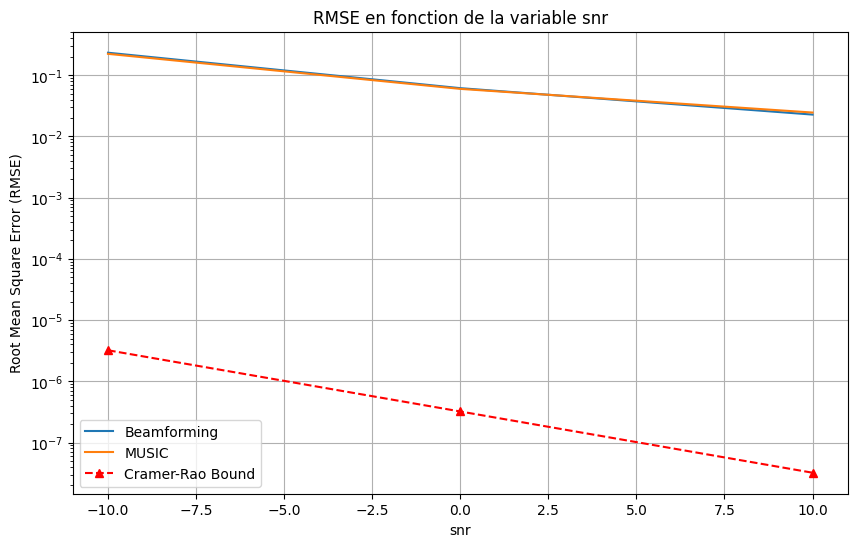

In [9]:
run_comparison(parameter_to_compare, algorithms_to_compare, nb_iterations, nbSources, nbSensors, theta, nbTimePoints, snr, correlation, var_ratio, perturbation_parameter_sd, two_symmetrical_angles)